# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [313]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [314]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [315]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [316]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [317]:
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [318]:
trs = soup.find_all('tr')
trs

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [367]:
# Create an empty list
marven_list = []

# Loop through the scraped data to create a list of rows
for tr in trs[1:]: 
   
    a                 = tr.find_all("td")
    
    ID                = a[0].text
    terrestrial_date  = a[1].text
    terrestrial_date1 = terrestrial_date.replace('-', ' ')
    sol               = a[2].text
    ls                = a[3].text
    month             = a[4].text
    min_temp          = a[5].text
    pressure          = a[6].text
    
    marven_dict  = [ID, terrestrial_date1, sol, ls, month, min_temp, pressure]
    
    # Append the dictionary to the marven list
    marven_list.append(marven_dict)

In [368]:
marven_list

[['2', '2012 08 16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012 08 17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012 08 18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012 08 19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012 08 20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012 08 21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012 08 22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012 08 23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012 08 27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012 08 28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012 08 29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012 08 30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012 08 31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012 09 01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012 09 02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012 09 03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012 09 04', '29', '166', '6', '-75.0',

In [369]:
ths = soup.find_all('th')
ths

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [370]:
header_list = []

for th in ths: 
    
    h       = th.text
    print(h)
    # Append the dictionary to the header list
    header_list.append(h)

id
terrestrial_date
sol
ls
month
min_temp
pressure


In [371]:
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [383]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(marven_list, columns = header_list)

In [395]:
# Confirm DataFrame was created successfully
df.head(100)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
95,12,2012-11-26,109,213,8,-64.0,844.0
96,14,2012-11-27,110,214,8,-65.0,848.0
97,15,2012-11-28,111,214,8,-66.0,849.0
98,16,2012-11-29,112,215,8,-65.0,852.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [379]:
import numpy as np

In [388]:
# Change data types for data analysis
from datetime import datetime
convert_dict = {'sol': int,
                'terrestrial_date': np.datetime64,
                'ls': int,
                'month': int, 
                'min_temp': float,
                'pressure': float
                }
 
df = df.astype(convert_dict)

In [389]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [400]:
dg        = df.groupby('month')
dg

In [402]:
# 1. How many months are there on Mars?
Months    = dg["id"].count()
Months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [403]:
# 2. How many Martian days' worth of data are there?
print(len(df['sol']))

1867


In [406]:
# 3. What is the average low temperature by month?
avglowtemp    = dg["min_temp"].mean()
avglowtemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

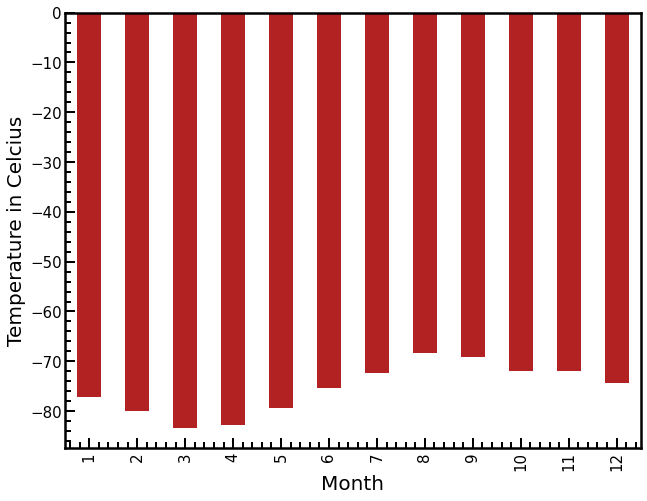

In [413]:
plt.figure(figsize=(9,7))

# Chart our data, give it a title, and label the axes
patron_chart = avglowtemp.plot(kind="bar", color='firebrick')
patron_chart.set_xlabel("Month", fontsize=20)
patron_chart.set_ylabel("Temperature in Celcius", fontsize=20)

plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
#plt.savefig("Fig1.png")
plt.show()

In [417]:
sortavglowtemp = avglowtemp.sort_values(ascending=True)
sortavglowtemp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

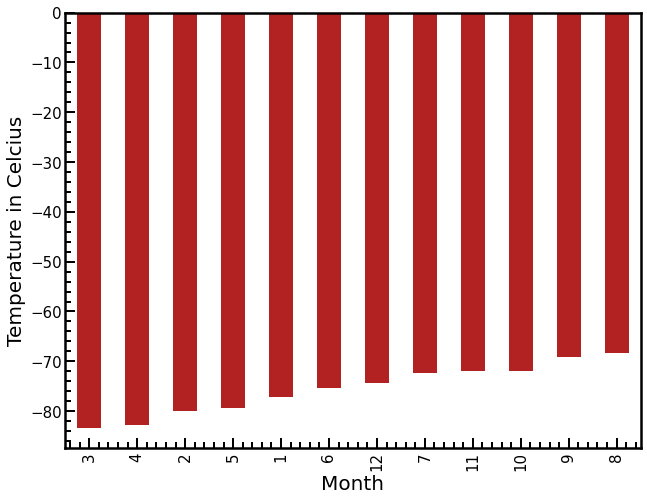

In [418]:
plt.figure(figsize=(9,7))

# Chart our data, give it a title, and label the axes
patron_chart = sortavglowtemp.plot(kind="bar", color='firebrick')
patron_chart.set_xlabel("Month", fontsize=20)
patron_chart.set_ylabel("Temperature in Celcius", fontsize=20)

plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
#plt.savefig("Fig1.png")
plt.show()

In [421]:
# 4. Average pressure by Martian month
avgpressure     = dg["pressure"].mean()
avgpressure 

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [422]:
sortavgpressure = avgpressure.sort_values(ascending=True)
sortavgpressure

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

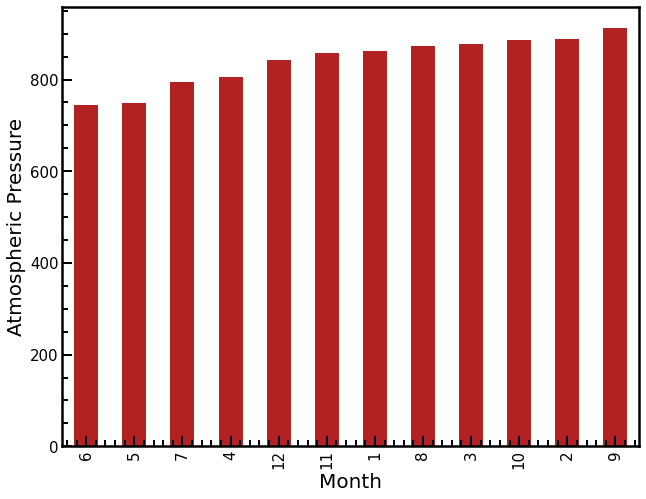

In [424]:
# Plot the average pressure by month

plt.figure(figsize=(9,7))

# Chart our data, give it a title, and label the axes
patron_chart = sortavgpressure.plot(kind="bar", color='firebrick')
patron_chart.set_xlabel("Month", fontsize=20)
patron_chart.set_ylabel("Atmospheric Pressure", fontsize=20)

plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
#plt.savefig("Fig1.png")
plt.show()

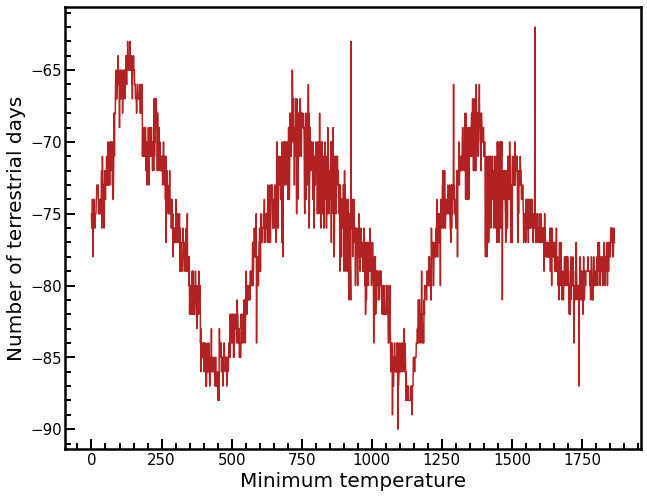

In [435]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.figure(figsize=(9,7))
plt.plot(df.index,df["min_temp"], color='firebrick')
plt.xlabel('Minimum temperature', fontsize=20)
plt.ylabel('Number of terrestrial days', fontsize=20)

plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
#plt.savefig("Fig1.png")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [436]:
# Write the data to a CSV
df.to_csv('Marven.csv') 

In [437]:
browser.quit()